In [1]:
# Import the libraries and set random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [2]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            if train == True:
                self.y[50:] = 20
        else:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.y = -3 * self.x + 1
            self.len = self.x.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [3]:
#Create train_data object and val_data object

train_data = Data()
val_data = Data(train = False)

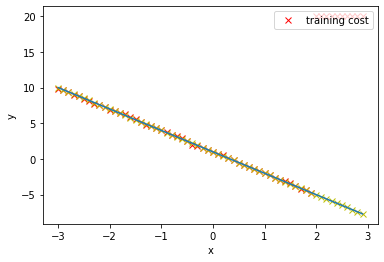

In [4]:
# Plot the training data points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr', label = 'training cost')

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'xy')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'upper right')
plt.show()

In [5]:
# Create linear regression model class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Predition
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
# Create the model object

model = linear_regression(1, 1)

In [7]:
# Create optimizer, cost function and data loader object

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

In [8]:
# Train the model

LOSS_TRAIN = []
LOSS_VAL = []
n=1;
min_loss = 1000

def train_model_early_stopping(epochs, min_loss):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train = criterion(model(train_data.x), train_data.y).item()
            loss_val = criterion(model(val_data.x), val_data.y).item()
            LOSS_TRAIN.append(loss_train)
            LOSS_VAL.append(loss_val)
            if loss_val < min_loss:
                value = epoch
                min_loss = loss_val
                torch.save(model.state_dict(), 'best_model.pt')

train_model_early_stopping(20, min_loss)

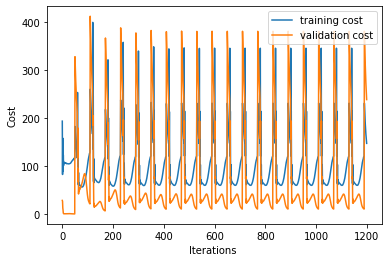

In [9]:
# Plot the loss

plt.plot(LOSS_TRAIN, label = 'training cost')
plt.plot(LOSS_VAL, label = 'validation cost')
plt.xlabel("Iterations ")
plt.ylabel("Cost")
plt.legend(loc = 'upper right')
plt.show()

In [10]:
# Create a new linear regression model object

model_best = linear_regression(1,1)

In [11]:
# Assign the best model to model_best

model_best.load_state_dict(torch.load('best_model.pt'))

<All keys matched successfully>

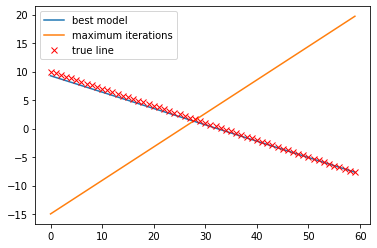

In [12]:
plt.plot(model_best(val_data.x).data.numpy(), label = 'best model')
plt.plot(model(val_data.x).data.numpy(), label = 'maximum iterations')
plt.plot(val_data.y.numpy(), 'rx', label = 'true line')
plt.legend()
plt.show()